### example classification

In [42]:
def _read_csv(input_file):
    with open(input_file, "r", encoding="utf-8") as f:
        lines = []
        for line in f:
            src, trg = line.strip().split("\t")
            if len(src)==len(trg):
                lines.append((src.split(), trg.split()))
        return lines

In [43]:
lines=_read_csv("../data/csc/ecspell/test_odw.txt")
print(lines[0])

(['完', '善', '检', '剑', '检', '测', '体', '系', '，', '加', '强', '检', '验', '检', '测', '公', '共', '服', '务', '平', '台', '建', '设', '。'], ['完', '善', '检', '验', '检', '测', '体', '系', '，', '加', '强', '检', '验', '检', '测', '公', '共', '服', '务', '平', '台', '建', '设', '。'])


In [44]:
num=0
for line in lines:
    if len(line[0])>54:
        num+=1
print(num)

123


In [45]:
def tuple2dict(example):
    src = example[0]
    trg = example[1]
    errors = []
    assert len(src)==len(trg)
    for st,tt in zip(src,trg):
        if st!=tt:
            errors+=[(st,tt)]
    return {"src":src, "trg":trg, "error":errors}


In [46]:
dict=tuple2dict(lines[0])
print(dict)

{'src': ['完', '善', '检', '剑', '检', '测', '体', '系', '，', '加', '强', '检', '验', '检', '测', '公', '共', '服', '务', '平', '台', '建', '设', '。'], 'trg': ['完', '善', '检', '验', '检', '测', '体', '系', '，', '加', '强', '检', '验', '检', '测', '公', '共', '服', '务', '平', '台', '建', '设', '。'], 'error': [('剑', '验')]}


In [47]:
len(dict["error"])

1

In [48]:
def lines2dicts(lines):
    dicts=[]
    for line in lines:
        dicts.append(tuple2dict(line))
    return dicts

In [49]:
dicts=lines2dicts(lines)
print(len(dicts))
print(dicts[110])

500
{'src': ['陕', '西', '省', '铜', '川', '市', '耀', '州', '区', '石', '柱', '镇', '马', '咀', '村', '党', '总', '支', '书', '记', '、', '村', '委', '会', '主', '任'], 'trg': ['陕', '西', '省', '铜', '川', '市', '耀', '州', '区', '石', '柱', '镇', '马', '咀', '村', '党', '总', '支', '书', '记', '、', '村', '委', '会', '主', '任'], 'error': []}


In [50]:
def dicts2errors(dicts):
    errors=[]
    for dict in dicts:
        for error in dict["error"]:
            if error not in errors:
                errors.append(error)
    return errors

In [51]:
errors=dicts2errors(dicts)
print(len(errors))
errors[:10]

372


[('剑', '验'),
 ('贱', '兼'),
 ('人', '任'),
 ('症', '政'),
 ('财', '才'),
 ('短', '段'),
 ('至', '制'),
 ('社', '设'),
 ('厨', '除'),
 ('私', '司')]

In [52]:
def errorsExtract(input_file):
    lines=_read_csv(input_file)
    dicts = lines2dicts(lines)
    errors = dicts2errors(dicts)
    return errors
    

In [53]:
trainLawErrors = errorsExtract("../data/csc/ecspell/train_law.txt")

In [54]:
print(len(trainLawErrors))
print(trainLawErrors)

1049
[('制', '治'), ('物', '务'), ('线', '限'), ('需', '须'), ('吐', '土'), ('券', '权'), ('是', '时'), ('使', '适'), ('练', '念'), ('祖', '主'), ('行', '刑'), ('拆', '诉'), ('食', '适'), ('室', '是'), ('裂', '列'), ('去', '法'), ('向', '项'), ('共', '公'), ('捡', '检'), ('兖', '充'), ('杳', '查'), ('牲', '性'), ('再', '在'), ('婶', '审'), ('发', '法'), ('源', '院'), ('挺', '庭'), ('丛', '从'), ('末', '未'), ('休', '体'), ('根', '限'), ('旨', '指'), ('广', '厂'), ('愿', '原'), ('付', '符'), ('名', '民'), ('证', '正'), ('重', '冲'), ('涂', '突'), ('武', '务'), ('厂', '常'), ('克', '可'), ('种', '中'), ('使', '是'), ('管', '官'), ('剔', '提'), ('除', '出'), ('全', '权'), ('纸', '支'), ('怼', '对'), ('桑', '商'), ('补', '不'), ('悟', '误'), ('意', '议'), ('白', '的'), ('消', '销'), ('大', '小'), ('字', '学'), ('荡', '当'), ('订', '定'), ('题', '提'), ('疑', '以'), ('整', '政'), ('兹', '知'), ('吹', '催'), ('觉', '决'), ('元', '原'), ('神', '审'), ('趁', '程'), ('虚', '序'), ('力', '理'), ('津', '律'), ('竞', '经'), ('技', '济'), ('苑', '院'), ('缓', '援'), ('安', '案'), ('检', '件'), ('冠', '官'), ('铁', '秩'), ('正', '证'), ('附', '符'), ('采', '裁')

In [55]:
trainmedErrors = errorsExtract("../data/csc/ecspell/train_med.txt")
trainodwErrors = errorsExtract("../data/csc/ecspell/train_odw.txt")

In [56]:
testlawErrors = errorsExtract("../data/csc/ecspell/test_law.txt")

In [57]:
print(len(testlawErrors))
cnt = 0
for error in testlawErrors:
    if error in trainLawErrors:
        cnt+=1
cnt

336


163

In [58]:
print(len(trainmedErrors))
print(len(trainodwErrors))

1605
1195


In [59]:
def write(lines,output_file):
    with open(output_file,'w',encoding='utf-8') as f:
        for line in lines:
            f.write(" ".join(line[0])+'\t'+" ".join(line[1])+'\n')
    return 

In [60]:
def include(A,B):
    for item in B:
        if item not in A:
            return False
    return True

In [61]:
def overlap(A,B):
    for item in B:
        if item in A:
            return True
    return False

In [62]:
include([1,2,3],[1,0])

False

In [63]:
overlap([1,2,3],[1,0])

True

In [64]:
def examplesDecomposition(input_file,output_file_inc,output_file_exc,output_file_non,output_file_multi,errors):
    lines = _read_csv(input_file)
    dicts = lines2dicts(lines)
    inc_examples=[]
    exc_examples=[]
    non_examples=[]
    multi_examples=[]
    for line,dict in zip(lines,dicts):
        if len(dict["error"])==0:
            non_examples.append(line)
        elif len(dict["error"])>1:
            multi_examples.append(line)
        elif include(errors,dict["error"]):
            inc_examples.append(line)
        else:
            exc_examples.append(line)
    write(inc_examples,output_file_inc)
    write(exc_examples,output_file_exc)
    write(non_examples,output_file_non)
    write(multi_examples,output_file_multi)

In [65]:
examplesDecomposition(input_file="../data/csc/ecspell/test_odw.txt",output_file_inc="../data/csc/ecspell/test_odw_inc.txt",\
                      output_file_exc="../data/csc/ecspell/test_odw_exc.txt",\
                        output_file_non = "../data/csc/ecspell/test_odw_non.txt",output_file_multi = "../data/csc/ecspell/test_odw_multi.txt",\
                        errors=trainLawErrors)

In [163]:
import random
def negExamplesSampling(input_file,output_file,num_neg):
    lines = _read_csv(input_file)
    dicts = lines2dicts(lines)
    new_neg_examples = []
    neg_examples=[]
    pos_examples=[]
    new_dataset = []
    for line,dict in zip(lines,dicts):
        if len(dict["error"])==0:
            neg_examples.append(line)
        else:
            pos_examples.append(line)
    print(len(pos_examples))
    if num_neg<len(neg_examples):
        neg_sampling = random.sample(neg_examples,num_neg)
        new_dataset = neg_sampling + pos_examples
        write(new_dataset,output_file)
        print(len(new_dataset))
    elif num_neg>len(neg_examples) and num_neg<=2*len(neg_examples):
        num_new_neg = num_neg-len(neg_examples)
        neg_sampling = random.sample(neg_examples,num_new_neg)
        new_dataset = lines + neg_sampling
        write(new_dataset,output_file)
        print(len(new_dataset))
    else:
        return

    

In [164]:
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_50.txt",num_neg= 50)

255
305


In [59]:
lines = _read_csv("../data/csc/ecspell/test_law_50.txt")

In [60]:
len(lines)

305

In [165]:
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_100.txt",num_neg= 100)
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_150.txt",num_neg= 150)
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_200.txt",num_neg= 200)

255
355
255
405
255
455


In [166]:
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_500.txt",num_neg= 500)
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_400.txt",num_neg= 400)
negExamplesSampling(input_file="../data/csc/ecspell/test_law.txt",output_file="../data/csc/ecspell/test_law_300.txt",num_neg= 300)

255
255
655
255
555


### over-correction and false postive rate

In [4]:
def p_calculate(ratio,fpr,r,wpr):
    fpr/=100
    r/=100
    wpr/=100
    p =  1/(1+ratio*(fpr/r)+(wpr/r))
    return p*100

In [5]:
def f1_calculate(p,r):
    return 2*p*r/(p+r)

In [6]:
def ratio_calculate (p,fpr,r,wpr):
    p/=100
    fpr/=100
    r/=100
    wpr/=100
    ratio = (1.0-p-p*(wpr/r))*r/(fpr*p)
    return ratio

In [7]:
ratio_calculate(p=41.4,fpr=11.8,r=34.9,wpr=38.1)

0.957586178662082

In [8]:
245/255

0.9607843137254902

### fpr

In [9]:
fpr=16.4
r=68.2
wpr=21.0

In [10]:
import numpy as np
ratios = np.arange(0,10,0.01)
p_list = np.array([p_calculate(ratio,fpr,r,wpr) for ratio in ratios])
f1_list = np.array([f1_calculate(p,r) for p in p_list])

In [11]:
fpr = 6.9
r = 87.8
wpr = 11.0
ratios = np.arange(0,10,0.01)
p_list_lm = np.array([p_calculate(ratio,fpr,r,wpr) for ratio in ratios])
f1_list_lm = np.array([f1_calculate(p,r) for p in p_list_lm])

In [12]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


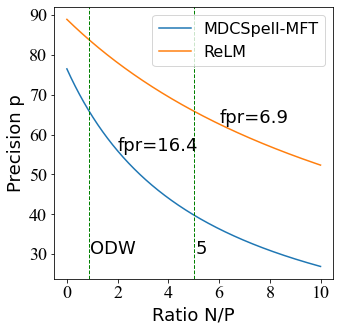

In [14]:
plt.figure(figsize=(5,5))
plt.plot(ratios,p_list,label="MDCSpell-MFT")
plt.plot(ratios,p_list_lm,label="ReLM")
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.axvline(x=0.87, c="g", ls="--", lw=1)
plt.axvline(x=5, c="g", ls="--", lw=1)


plt.text(6,63,"fpr=6.9",fontsize=18)
plt.text(2,56,"fpr=16.4",fontsize=18)

plt.xlabel("Ratio N/P",fontdict={'size':18})
plt.ylabel("Precision p",fontdict={'size':18})
plt.text(5.05,30,"5",fontsize=18)
plt.text(0.9,30,"ODW",fontsize=18)
plt.legend(loc='best',prop={'size':16})
plt.savefig("precision.eps",dpi=300,format='eps')




In [17]:
plt.figure(figsize=(5,5))
plt.plot(ratios,p_list,label="MDCSpell-MFT")
plt.plot(ratios,p_list_lm,label="ReLM")
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.axvline(x=0.87, c="g", ls="--", lw=1)
plt.axvline(x=5, c="g", ls="--", lw=1)

plt.text(6,63,"fpr=6.9",fontsize=18)
plt.text(2,56,"fpr=16.4",fontsize=18)

plt.xlabel("Ratio N/P",fontdict={'size':18})
plt.ylabel("Precision p",fontdict={'size':18})
plt.text(5.05,30,"5",fontsize=18)
plt.text(0.9,30,"ODW",fontsize=18)
plt.legend(loc='best',prop={'size':16})

pdf = PdfPages('precision.pdf') 
pdf.savefig(bbox_inches='tight')
plt.close()
pdf.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


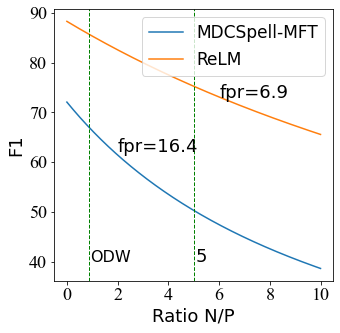

In [15]:
plt.figure(figsize=(5,5))
plt.plot(ratios,f1_list,label="MDCSpell-MFT")
plt.plot(ratios,f1_list_lm,label="ReLM")
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.axvline(x=0.87, c="g", ls="--", lw=1)
plt.axvline(x=5, c="g", ls="--", lw=1)

plt.text(6,73,"fpr=6.9",fontsize=18)
plt.text(2,62,"fpr=16.4",fontsize=18)

plt.xlabel("Ratio N/P",fontdict={'size':18})
plt.ylabel("F1",fontdict={'size':18})
plt.text(5.05,40,"5",fontsize=18)
plt.text(0.9,40,"ODW",fontsize=16)
plt.legend(loc='best',prop={'size':17})

plt.savefig("f1.pdf",dpi=300,format='eps')

In [16]:
plt.figure(figsize=(5,5))
plt.plot(ratios,f1_list,label="MDCSpell-MFT")
plt.plot(ratios,f1_list_lm,label="ReLM")
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.axvline(x=0.87, c="g", ls="--", lw=1)
plt.axvline(x=5, c="g", ls="--", lw=1)

plt.text(6,73,"fpr=6.9",fontsize=18)
plt.text(2,62,"fpr=16.4",fontsize=18)

plt.xlabel("Ratio N/P",fontdict={'size':18})
plt.ylabel("F1",fontdict={'size':18})
plt.text(5.05,40,"5",fontsize=18)
plt.text(0.9,40,"ODW",fontsize=18)
plt.legend(loc='best',prop={'size':16})

plt.savefig("f1.pdf",dpi=300,format='eps')
pdf = PdfPages('f1.pdf') 
pdf.savefig(bbox_inches='tight')
plt.close()
pdf.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


#### mask rate

(50.0, 80.0)

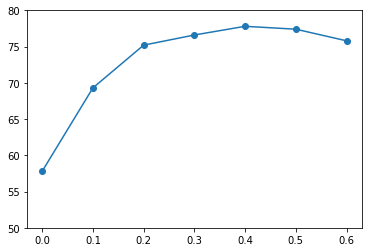

In [19]:
mask_rates = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6])
f1_mask_rates = np.array([57.8, 69.3, 75.2, 76.6,77.8, 77.4, 75.8])
plt.plot(mask_rates, f1_mask_rates)
plt.scatter(mask_rates,f1_mask_rates,marker='o')
plt.ylim((50,80))

In [225]:
import torch

In [226]:
a = torch.rand(6,3)
shape = a.size()

In [227]:
csc_task_matrix=torch.ones(shape)
csc_task_matrix

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [228]:
task_ids = torch.tensor([1,2,3,2,2,1],dtype=torch.long)
task_ids_=task_ids.unsqueeze(dim=-1).expand(csc_task_matrix.size())

In [229]:
task_ids_!=csc_task_matrix

tensor([[False, False, False],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [230]:
a = [1,2,3]
b = [-100]*-2+a
b

[1, 2, 3]

In [231]:
import torch
from transformers import AutoTokenizer

In [232]:
from transformers import BertTokenizer, GPT2LMHeadModel
tokenizer = BertTokenizer.from_pretrained("uer/gpt2-chinese-cluecorpussmall")
model = GPT2LMHeadModel.from_pretrained("uer/gpt2-chinese-cluecorpussmall")

In [233]:
tokenizer.sep_token_id

102

In [130]:
source = ["我","们"]
#source = "我们"

In [131]:
encoded_inputs = tokenizer(source, add_special_tokens=False ,is_split_into_words=True)
encoded_inputs['input_ids'] = [tokenizer.cls_token_id]+encoded_inputs['input_ids']

In [132]:
encoded_inputs

{'input_ids': [101, 2769, 812], 'token_type_ids': [0, 0], 'attention_mask': [1, 1]}

In [136]:
tokenizer.convert_ids_to_tokens(encoded_inputs["input_ids"],skip_special_tokens=True)

'我 们'

In [164]:
a = torch.tensor([[1,2,3],[2,5,3]])
a

tensor([[1, 2, 3],
        [2, 5, 3]])

In [162]:
a[torch.where(a!=1)]

tensor([2, 3, 2, 3, 3])

In [168]:
a.cpu().numpy().tolist

<function ndarray.tolist>

In [157]:
np.array(a).shape

(3,)

In [159]:
tokenizer.pad_token_id

0

In [166]:
torch.max(a,-1)[1]==a.argmax(dim=-1)

tensor([True, True])

In [4]:
tokenizer.convert_ids_to_tokens(10000000)

'[UNK]'

In [6]:
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")
tokenizer.vocab_size

21128

In [66]:
234/266

0.8796992481203008